In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_curve, auc, classification_report, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

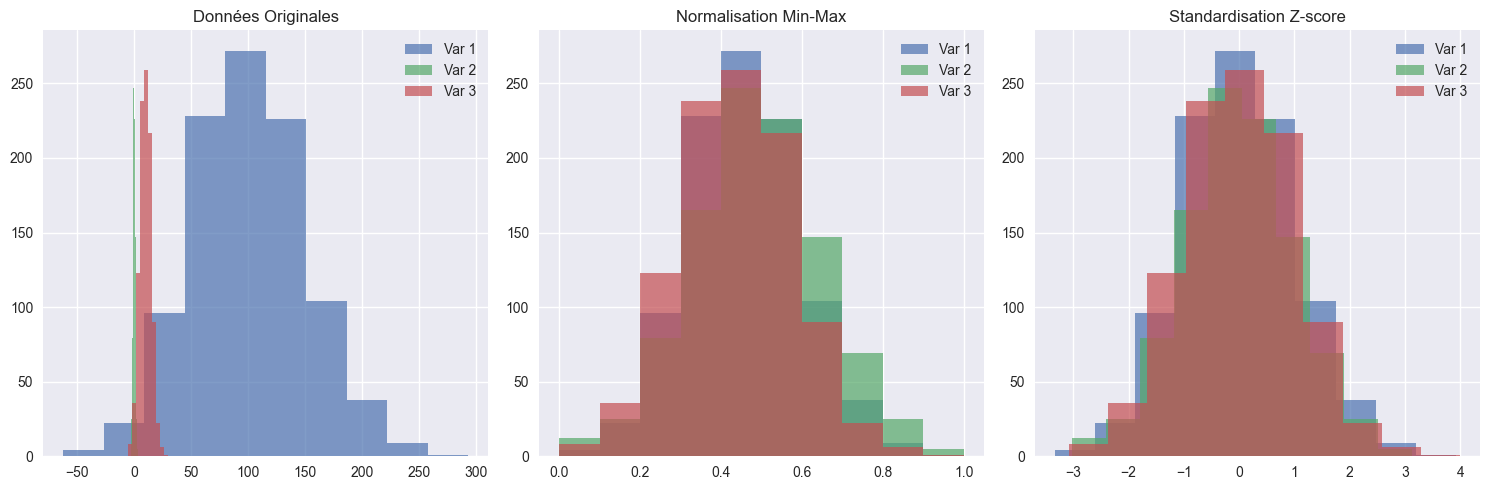

In [6]:
X = np.column_stack([
    # Variable à grande échelle
    np.random.normal(100, 50, 1000),  
    # Variable à petite échelle
    np.random.normal(0, 1, 1000), 
    # Variable à échelle moyenne    
    np.random.normal(10, 5, 1000)     
])

# transformations
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

X_minmax = scaler_minmax.fit_transform(X)
X_standard = scaler_standard.fit_transform(X)

# Visualisation
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Données originales
for i in range(3):
    axes[0].hist(X[:, i], alpha=0.7, label=f'Var {i+1}')
axes[0].set_title('Données Originales')
axes[0].legend()

# Données normalisées
for i in range(3):
    axes[1].hist(X_minmax[:, i], alpha=0.7, label=f'Var {i+1}')
axes[1].set_title('Normalisation Min-Max')
axes[1].legend()

# Données standardisées
for i in range(3):
    axes[2].hist(X_standard[:, i], alpha=0.7, label=f'Var {i+1}')
axes[2].set_title('Standardisation Z-score')
axes[2].legend()

plt.tight_layout()
plt.show()


In [7]:

# Impact sur un modèle KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                          n_clusters_per_class=1, random_state=42)

# Ajout d'une variable à grande échelle
X[:, 1] = X[:, 1] * 100  # La deuxième variable est 100x plus grande

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN sans preprocessing
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)
accuracy_raw = knn_raw.score(X_test, y_test)

# KNN avec standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
accuracy_scaled = knn_scaled.score(X_test_scaled, y_test)

print(f"Accuracy sans preprocessing: {accuracy_raw:.3f}")
print(f"Accuracy avec standardisation: {accuracy_scaled:.3f}")

Accuracy sans preprocessing: 0.883
Accuracy avec standardisation: 0.933
